<a href="https://colab.research.google.com/github/Zarathustra616/CV-and-ML/blob/main/Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
ap.add_argument("-f", "--face", type=str,
	default="face_detector",
	help="path to face detector model directory")
ap.add_argument("-m", "--model", type=str,
	default="/content/model.model",
	help="path to trained face mask detector model")
ap.add_argument("-c", "--confidence", type=float, default=0.5,
	help="minimum probability to filter weak detections")
args = vars(ap.parse_args(['--image', '/content/m9zZq58oqK4.jpg']))

In [4]:
print("[INFO] loading face detector model...")
prototxtPath = os.path.sep.join([args["face"], "deploy.prototxt"])
weightsPath = os.path.sep.join([args["face"], "res10_300x300_ssd_iter_140000.caffemodel"])
print(prototxtPath, weightsPath)

[INFO] loading face detector model...
face_detector/deploy.prototxt face_detector/res10_300x300_ssd_iter_140000.caffemodel


In [5]:
net = cv2.dnn.readNet('/content/gdrive/My Drive/colab/deploy.prototxt', '/content/gdrive/My Drive/colab/res10_300x300_ssd_iter_140000.caffemodel')

print("[INFO] loading face mask detector model...")
model = load_model('/content/gdrive/My Drive/colab/mobile.h5')

[INFO] loading face mask detector model...


In [6]:
image = cv2.imread('/content/gdrive/My Drive/colab/example/01.jpg')
orig = image.copy()
(h, w) = image.shape[:2]

blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))

print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing face detections...


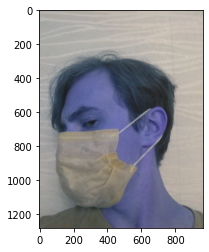

In [9]:
plt.imshow(image)

In [10]:
for i in range(0, detections.shape[2]):
	# Извлечение вероятности
	confidence = detections[0, 0, i, 2]
	# Фильтрация вероятности 
	if confidence > 0.7:
		# Расчет координат рамки
		print(2)
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		(startX, startY) = (max(0, startX), max(0, startY))
		(endX, endY) = (min(w - 1, endX), min(h - 1, endY))
  		# Извлечение ROI, перевод из RGB в BGR
		face = image[startY:endY, startX:endX]
		face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
		face = cv2.resize(face, (224, 224))
		face = img_to_array(face)
		face = preprocess_input(face)
		face = np.expand_dims(face, axis=0)
		# Прогон через модель
		(mask, withoutMask) = model.predict(face)[0]
  		# Определение формата рамок для классов
		label = "Mask" if mask > withoutMask else "No Mask"
		print(mask,1)
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
		print(label)
		# Отображение рамки и надписей
		cv2.putText(image, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

2
0.9999473 1
Mask: 99.99%


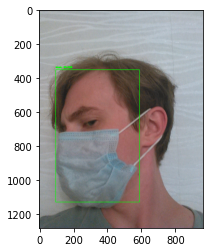

In [11]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.savefig('/content/2')